<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/dtplay.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [8]:


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['outlook', 'temp', 'humidity', 'windy','play']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)




# Print head
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [ ]:
x=df.drop("play",axis=1)
y=df['play']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3

[[0 1]
 [1 1]]


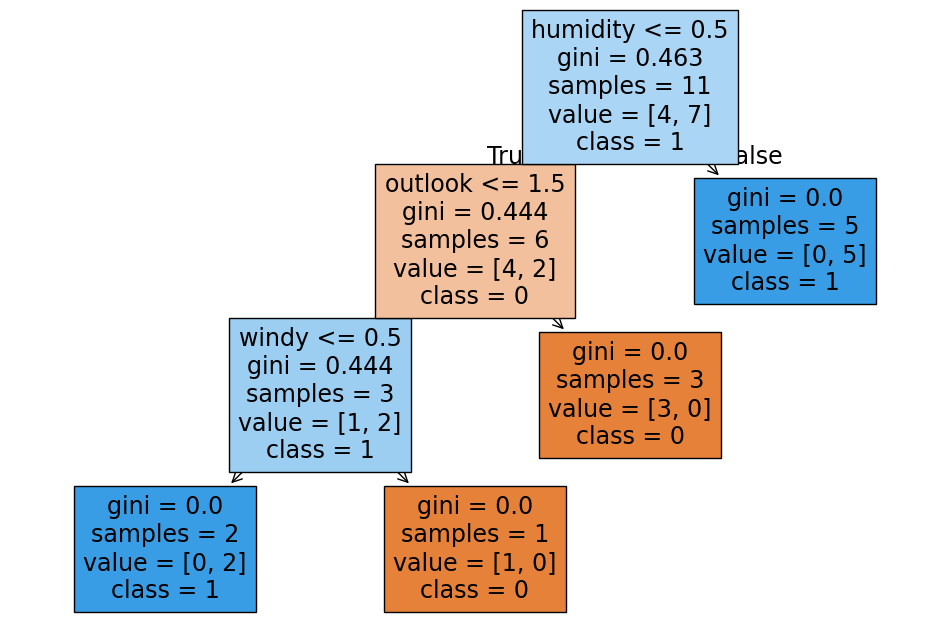

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=x.columns, class_names=['0', '1'], filled=True)
plt.show()

In [1]:
# New dataset




import kagglehub


# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")


print("Path to dataset files:", path)


100%|██████████| 751k/751k [00:00<00:00, 77.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [21]:
import pandas as pd
df=pd.read_csv(r"/root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv")
df


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['person_home_ownership','person_gender', 'person_education','loan_intent','previous_loan_defaults_on_file']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [23]:
df['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


In [24]:
# prompt: split the model scale it and train the model and find accuracy
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# Splitting the data
y = df['loan_status']

x = df.drop("loan_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Training the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Making predictions
y_pred = dt.predict(X_test)

# Evaluating the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# # Visualizing the decision tree (optional)
# plt.figure(figsize=(12, 8))
# plot_tree(dt, feature_names=x.columns, class_names=['0', '1'], filled=True) # Assuming binary classification, adjust class_names if needed
# plt.show()


0.9
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6984
           1       0.77      0.78      0.78      2016

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000

[[6523  461]
 [ 439 1577]]


In [25]:
#Random forest
#ensemble methods
#1bagging more decisin trees combinig together
#2 boosting the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.9


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      6984
           1       0.77      0.78      0.78      2016

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



[[6523  461]
 [ 439 1577]]


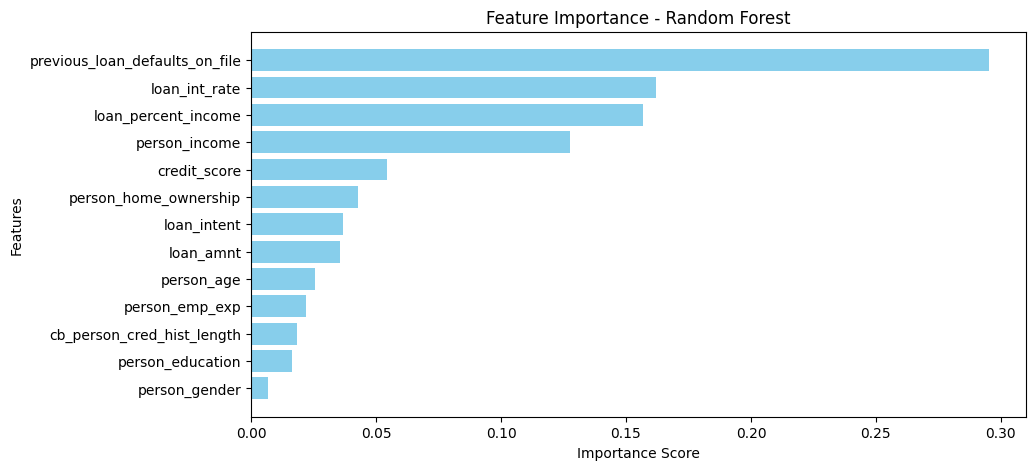

In [28]:
# Get feature importance
feature_importances = dt.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [29]:
print(feature_importance_df)

                           Feature  Importance
12  previous_loan_defaults_on_file    0.295362
8                    loan_int_rate    0.161869
9              loan_percent_income    0.156909
3                    person_income    0.127572
11                    credit_score    0.054430
5            person_home_ownership    0.042901
7                      loan_intent    0.036650
6                        loan_amnt    0.035502
0                       person_age    0.025405
4                   person_emp_exp    0.021945
10      cb_person_cred_hist_length    0.018542
2                 person_education    0.016205
1                    person_gender    0.006710


In [31]:
import pandas as pd


data=pd.read_csv("/content/breast-cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
#converting M to 1 and other as 0

data.diagnosis=[1 if value=="M" else 0 for value in data.diagnosis]

<Axes: xlabel='diagnosis'>

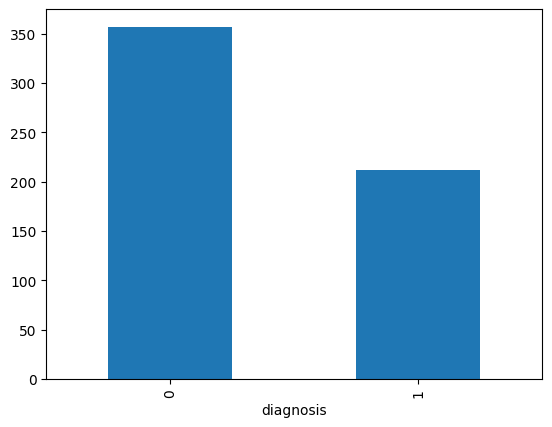

In [34]:
data["diagnosis"]=data['diagnosis'].astype('category',copy=False)
data['diagnosis'].value_counts().plot(kind='bar')

In [35]:
# features and target
target=data['diagnosis']
featured=data.drop(['diagnosis'],axis=1)



In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(featured,target,test_size=0.2,random_state=42)

# Training the model
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

# Making predictions
y_pred = dt.predict(X_test)

# Evaluating the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.9210526315789473
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

[[66  5]
 [ 4 39]]


In [40]:
#Random forest
#ensemble methods
#1bagging more decisin trees combinig together
#2 boosting the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.9210526315789473


              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



[[66  5]
 [ 4 39]]


In [48]:
print(len(data.columns))  # Number of features
print(len(dt1.feature_importances_))  # Should match the above


32
31


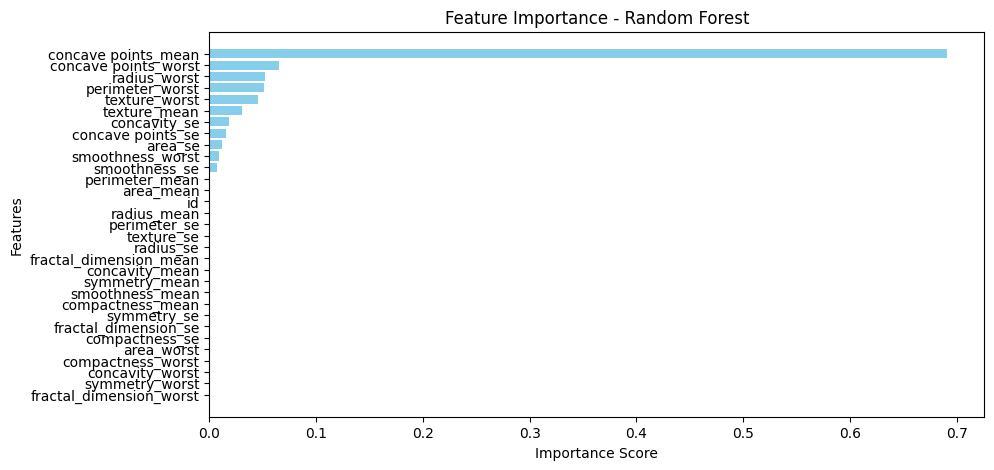

In [50]:
# Get feature importance
feature_importances = dt1.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': featured.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [51]:
print(feature_importance_df)

                    Feature  Importance
8       concave points_mean    0.691420
28     concave points_worst    0.065651
21             radius_worst    0.052299
23          perimeter_worst    0.051494
22            texture_worst    0.045114
2              texture_mean    0.030808
17             concavity_se    0.018554
18        concave points_se    0.015931
14                  area_se    0.011983
25         smoothness_worst    0.009233
15            smoothness_se    0.007513
3            perimeter_mean    0.000000
4                 area_mean    0.000000
0                        id    0.000000
1               radius_mean    0.000000
13             perimeter_se    0.000000
12               texture_se    0.000000
11                radius_se    0.000000
10   fractal_dimension_mean    0.000000
7            concavity_mean    0.000000
9             symmetry_mean    0.000000
5           smoothness_mean    0.000000
6          compactness_mean    0.000000
19              symmetry_se    0.000000


In [52]:
#hyperparameter tuning /another type of cross validation

from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
# Define hyperparameter grid for tuning
param_grid = {
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
# 1. **Grid Search CV** (Exhaustive Search for Best Hyperparameters)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Get the best parameters
print("Best parameters from Grid Search CV:", grid_search.best_params_)
print("Best accuracy from Grid Search CV:", grid_search.best_score_)
# Train with best parameters
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred_grid))


Best parameters from Grid Search CV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best accuracy from Grid Search CV: 0.9516483516483516

Grid Search CV Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Step 1: Define the model
model = RandomForestClassifier(random_state=42)

# Step 2: Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],       # Split criteria
    'max_depth': [5, 10, 15, None],                     # Max depth of tree
    'min_samples_split': [2, 5, 10],                    # Min samples to split internal node
    'min_samples_leaf': [1, 2, 4]                       # Min samples at a leaf node
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,               # Use all cores
    verbose=1                # Show progress
)

# Step 4: Train on training data
grid_search.fit(X_train, y_train)

# Step 5: Extract best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid_search.best_score_)

# Step 6: Evaluate on test data using best model
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)

print("\n📊 Classification Report (on Test Data):\n", classification_report(y_test, y_pred_grid))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
✅ Best Cross-Validated Accuracy: 0.9626373626373625

📊 Classification Report (on Test Data):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

